In [1]:
import pandas as pd
from geopy import GoogleV3

from keys import g_key
geolocator = GoogleV3(api_key=g_key)

import folium
import json
import requests
from folium.features import DivIcon

from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

import contextily as ctx
import tempfile

In [65]:
dots_v2 = pd.ExcelFile('../data/DOTS Infographic Data FY23.xlsx')

In [66]:
df1 = pd.read_excel(dots_v2, 'Professional Development')
df2 = pd.read_excel(dots_v2, 'Artists in the Schools')
df3 = pd.read_excel(dots_v2, 'Performances')
df4 = pd.read_excel(dots_v2, 'Beyond the Classroom')
df5 = pd.read_excel(dots_v2, 'Community Connections')

In [67]:
def data_transform(df):
    df.rename(columns={'FULL Address including zip code':'Address'}, inplace=True)
    df['Full Address'] = df['Address']  + ' ' + df['City'] + ' ' + df['State']
    df.Latitude = ""
    df['Longitude'] = ""
    df["loc"] = df["Full Address"].apply(geolocator.geocode)
    df["point"]= df["loc"].apply(lambda loc: tuple(loc.point) if loc else None)
    df[['Latitude', 'Longitude', 'Altitude']] = pd.DataFrame(df['point'].to_list(), index=df.index)
    df = df.drop(columns=['loc', 'point', 'Altitude'], inplace=True)

In [68]:
def transform_all(a, b, c, d, e):
    data_transform(a)
    data_transform(b)
    data_transform(c)
    data_transform(d)
    data_transform(e)

In [70]:
transform_all(df1, df2, df3, df4, df5)

In [71]:
def export_file(a, b, c, d, e):
    a.to_csv('df1.csv', index=False, header=True)
    b.to_csv('df2.csv', index=False, header=True)
    c.to_csv('df3.csv', index=False, header=True)
    d.to_csv('df4.csv', index=False, header=True)
    e.to_csv('df5.csv', index=False, header=True)

In [72]:
export_file(df1, df2, df3, df4, df5)

In [260]:
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv') 
df3 = pd.read_csv('df3.csv')
df4 = pd.read_csv('df4.csv')
df5 = pd.read_csv('df5.csv')

In [171]:
df5

,Name of Location (if applicable),Address,City,State,Zipcode,"Sub-Program (Fiesta, Sing-Along, Guitar Class, Posada)",Full Address,Longitude,Latitude
0,Carlton Senior Living,4732 Old Redwood Hwy,Santa Rosa,CA,95403.0,Sing Along,4732 Old Redwood Hwy Santa Rosa CA,-122.749588,38.500487
1,Individual,2389 McBride,Santa Rosa,CA,95403.0,Guitar Class,2389 McBride Santa Rosa CA,-122.730611,38.462812
2,Individual,100 Kendall Way,Windsor,CA,95492.0,Guitar Class,100 Kendall Way Windsor CA,-122.78125,38.527673
3,Individual,941 West 8th,Santa Rosa,CA,95401.0,Guitar Class,941 West 8th Santa Rosa CA,-122.714055,38.440429
4,Individual,285 E Railroad Ave,Cotati,CA,94931.0,Guitar Class,285 E Railroad Ave Cotati CA,-122.689391,38.315084
5,Individual,2336 Providence St,Santa Rosa,CA,95401.0,Guitar Class,2336 Providence St Santa Rosa CA,-122.761782,38.429934
6,Individual,127 Lincoln St,Santa Rosa,CA,95401.0,Guitar Class,127 Lincoln St Santa Rosa CA,-122.725755,38.445347
7,Individual,1409 Pebblecreek Dr,Santa Rosa,CA,95407.0,Guitar Class,1409 Pebblecreek Dr Santa Rosa CA,-122.727065,38.410807
8,Individual,127 Cottontail Way,Windsor,CA,95492.0,Guitar Class,127 Cottontail Way Windsor CA,-122.809882,38.550467
9,Individual,1121 Santa Cruz Way,Rohnert Park,CA,94928.0,Guitar Class,1121 Santa Cruz Way Rohnert Park CA,-122.688159,38.347967


In [261]:
def drop_columns(a, b, c, d, e):
    a.drop(columns=['Address', 'City', 'State', 'Zipcode', 'Full Address', 'Sub-Program (Mariachi Institute, IDEA, T4T, TAT)'], inplace=True)
    b.drop(columns=['Address', 'City', 'State', 'Zipcode', 'Full Address', 'Sub-Program (AIR, A4A)'], inplace=True)
    c.drop(columns=['Address', 'City', 'State', 'Zipcode', 'Full Address'], inplace=True)
    d.drop(columns=['Address', 'City', 'State', 'Zipcode', 'Full Address', 'Sub-Program (TEAM; M4S, Ensemble, Camp, MC & SC)'], inplace=True)
    e.drop(columns=['Address', 'City', 'State', 'Zipcode', 'Full Address', 'Sub-Program (Fiesta, Sing-Along, Guitar Class, Posada)'], inplace=True)

In [262]:
drop_columns(df1, df2, df3, df4, df5)

In [263]:
def rename_col(a, b, c, d, e):
    a.rename(columns={'Name of Location (if applicable)' : 'Name'}, inplace=True)
    b.rename(columns={'Name of Location (if applicable)' : 'Name'}, inplace=True)
    c.rename(columns={'Name of Location (if applicable)' : 'Name'}, inplace=True)
    d.rename(columns={'Name of Location (if applicable)' : 'Name'}, inplace=True)
    e.rename(columns={'Name of Location (if applicable)' : 'Name'}, inplace=True)

In [264]:
rename_col(df1, df2, df3, df4, df5)

In [265]:
def fill_na(a, b, c, d, e):
    a['Name'] = a['Name'].fillna('Name')
    a.reset_index(drop=True)
    b['Name'] = b['Name'].fillna('Name')
    b.reset_index(drop=True)
    c['Name'] = c['Name'].fillna('Name')
    c.reset_index(drop=True)
    d['Name'] = d['Name'].fillna('Name')
    d.reset_index(drop=True)
    e['Name'] = e['Name'].fillna('Name')
    e.reset_index(drop=True)

In [266]:
fill_na(df1, df2, df3, df4, df5)

In [267]:
df1

,Name,Longitude,Latitude
0,Name,-122.664534,38.488058
1,Name,-122.708476,38.517241
2,Name,-122.860084,38.656858
3,Oak Grove Union School District,-122.806378,38.438115
4,Sonoma County Office of Education,-122.798128,38.512201
...,...,...,...
62,Willowside Middle School,-122.805496,38.438465
63,Name,-122.638477,38.242895
64,Name,-122.899470,38.479254
65,Name,-122.686912,38.254808


In [268]:
df1['Name'].dtypes

dtype('O')

In [269]:
def drop_nan(a, b, c, d, e):
    a.dropna(inplace=True)
    a.reset_index(drop=True)
    b.dropna(inplace=True)
    b.reset_index(drop=True)
    c.dropna(inplace=True)
    c.reset_index(drop=True)
    d.dropna(inplace=True)
    d.reset_index(drop=True)
    e.dropna(inplace=True)
    e.reset_index(drop=True)

In [270]:
drop_nan(df1, df2, df3, df4, df5)

In [271]:
def export_file_2(a, b, c, d, e):
    a.to_csv('df_1.csv', index=False, header=True)
    b.to_csv('df_2.csv', index=False, header=True)
    c.to_csv('df_3.csv', index=False, header=True)
    d.to_csv('df_4.csv', index=False, header=True)
    e.to_csv('df_5.csv', index=False, header=True)

In [272]:
export_file_2(df1, df2, df3, df4, df5)

In [2]:
df1 = pd.read_csv('df_1.csv')
df2 = pd.read_csv('df_2.csv') 
df3 = pd.read_csv('df_3.csv')
df4 = pd.read_csv('df_4.csv')
df5 = pd.read_csv('df_5.csv')

In [3]:
df1

,Name,Longitude,Latitude
0,Name,-122.664534,38.488058
1,Name,-122.708476,38.517241
2,Name,-122.860084,38.656858
3,Oak Grove Union School District,-122.806378,38.438115
4,Sonoma County Office of Education,-122.798128,38.512201
...,...,...,...
62,Willowside Middle School,-122.805496,38.438465
63,Name,-122.638477,38.242895
64,Name,-122.899470,38.479254
65,Name,-122.686912,38.254808


In [4]:
lat1 = []
lat2 = []
lat3 = []
lat4 = []
lat5 = []
lng1 = []
lng2 = []
lng3 = []
lng4 = []
lng5 = []

In [5]:
lat1.extend(df1.Latitude)
lat2.extend(df2.Latitude)
lat3.extend(df3.Latitude)
lat4.extend(df4.Latitude)
lat5.extend(df5.Latitude)

In [6]:
lng1.extend(df1.Longitude)
lng2.extend(df2.Longitude)
lng3.extend(df3.Longitude)
lng4.extend(df4.Longitude)
lng5.extend(df5.Longitude)

In [7]:
pro_dev = []
artists = []
performances = []
beyond = []
community = []

In [8]:
pro_dev.extend(df1['Name'])
artists.extend(df2['Name'])
performances.extend(df3['Name'])
beyond.extend(df4['Name'])
community.extend(df5['Name'])

In [9]:
def number_DivIcon(color):
    """ Create a 'numbered' icon
    
    """
    icon = DivIcon(
            icon_size=(0,0),
            icon_anchor=(0,0),
            html="""<span class="dot" style="background-color : {:s}; height: 7px; width: 7px; border-radius: 50%; display: inline-block;"></span>
                """.format(color)
        )
    return icon

In [10]:
col_hex = ['#52b3ce',
 '#d8355d',
 '#43348d',
'#669c52',
'#efd249']

In [33]:
tile_1 = 'https://api.mapbox.com/styles/v1/jimmywhite87/cl4ehd5bz001614mj2o4vo83v/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiamltbXl3aGl0ZTg3IiwiYSI6ImNsNHV0cmI0YTFvamMza2xwMGpucHc3ODgifQ.Y86Fp2t5Xo02YBfXqJliKA'

attribution = '© <a href="https://www.mapbox.com/about/maps/">Mapbox</a> © <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> <strong><a href="https://www.mapbox.com/map-feedback/" target="_blank">Improve this map</a></strong>'

m = folium.Map(location=[lat1[0], lng1[0]], tiles=tile_1, attr = attribution)

for lats, long, name in zip(lat1, lng1, pro_dev):
    folium.Marker(location=[lats, long],
        popup = name,
        icon = number_DivIcon(col_hex[0])
     ).add_to(m)
for lats, long, name in zip(lat2, lng2, artists):
    folium.Marker(location=[lats, long],
        popup = name,
        icon = number_DivIcon(col_hex[1])
     ).add_to(m)
for lats, long, name in zip(lat3, lng3, performances):
    folium.Marker(location=[lats, long],
        popup = name,
        icon = number_DivIcon(col_hex[2])
     ).add_to(m)
for lats, long, name in zip(lat4, lng4, beyond):
    folium.Marker(location=[lats, long],
        popup = name,
        icon = number_DivIcon(col_hex[3])
     ).add_to(m)
for lats, long, name in zip(lat5, lng5, community):
    folium.Marker(location=[lats, long],
        popup = name,
        icon = number_DivIcon(col_hex[4])
     ).add_to(m)
m.fit_bounds([[38.828356, -122.340458], [38.086019, -122.856856]])
m

In [11]:
geometry1 = [Point(xy) for xy in zip(lng1,lat1)]
geometry2 = [Point(xy) for xy in zip(lng2,lat2)]
geometry3 = [Point(xy) for xy in zip(lng3,lat3)]
geometry4 = [Point(xy) for xy in zip(lng4,lat4)]
geometry5 = [Point(xy) for xy in zip(lng5,lat5)]

In [12]:
geo_df1 = gpd.GeoDataFrame(geometry = geometry1)
geo_df2 = gpd.GeoDataFrame(geometry = geometry2)
geo_df3 = gpd.GeoDataFrame(geometry = geometry3)
geo_df4 = gpd.GeoDataFrame(geometry = geometry4)
geo_df5 = gpd.GeoDataFrame(geometry = geometry5)

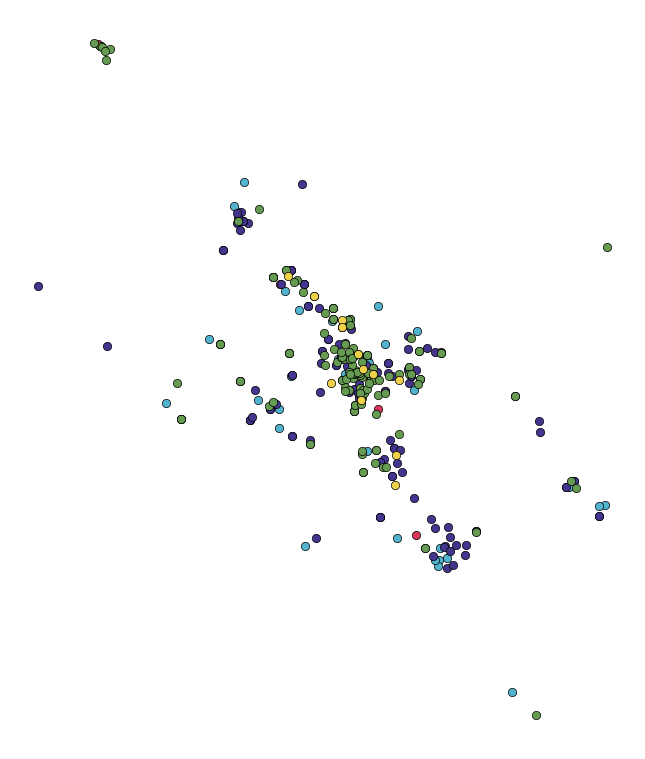

In [49]:
fig, ax = plt.subplots(figsize=(12.8, 9.6))

geo_df1.plot(ax=ax, marker='o', facecolor=col_hex[0], edgecolor='black', linewidth=0.5)
geo_df2.plot(ax=ax, marker='o', facecolor=col_hex[1], edgecolor='black', linewidth=0.5)
geo_df3.plot(ax=ax, marker='o', facecolor=col_hex[2], edgecolor='black', linewidth=0.5)
geo_df4.plot(ax=ax, marker='o', facecolor=col_hex[3], edgecolor='black', linewidth=0.5)
geo_df5.plot(ax=ax, marker='o', facecolor=col_hex[4], edgecolor='black', linewidth=0.5)

ax.axis('off')
fig.savefig('new.eps', format='eps', dpi=300)

In [48]:
print(plt.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines